In [86]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

exp = 'results.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
print(type(df))
df = df.loc[df['labeled']==False]
const = 0.029
df['bayes_error'] = np.mean(df['bayes_error']) - const
df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') 
df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') 
df.dtypes

<class 'pandas.core.frame.DataFrame'>


kernel_df                 int64
beta                      int64
bayes_error             float64
n_source                  int64
n_target                  int64
labeled                    bool
classical                object
supervised               object
lipton                   object
oracle                   object
prop-target-estimate     object
iter                      int64
setup                    object
lipton-excess           float32
oracle-excess           float32
dtype: object

In [87]:
measure = ['lipton-excess', 'oracle-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)
result

n_source n_target lipton-excess           oracle-excess          
                              mean       std          mean       std
0        20      100      0.432183  0.070515      0.174853  0.032727
1        40      100      0.336253  0.066360      0.150133  0.023245
2        80      100      0.202383  0.073226      0.116863  0.015703
3       160      100      0.101533  0.037558      0.084603  0.013768
4       320      100      0.056833  0.010712      0.054523  0.010176
5       400       20      0.054143  0.022753      0.045953  0.009309
6       400       40      0.049393  0.013856      0.045813  0.009600
7       400       80      0.049543  0.012799      0.046813  0.010046
8       400      160      0.048703  0.010785      0.047263  0.009851
9       400      320      0.048083  0.010391      0.046713  0.009577
10      400      640      0.046963  0.011038      0.045283  0.010213
11      400     1280      0.048783  0.011309      0.047753  0.011298
12      640      100      0.032593  0.009069      0.032063  0.008789
13     1280      100      0.014703  0.007671      0.014853  0.007834
14     2560      100      0.004403  0.006177      0.004693  0.005962

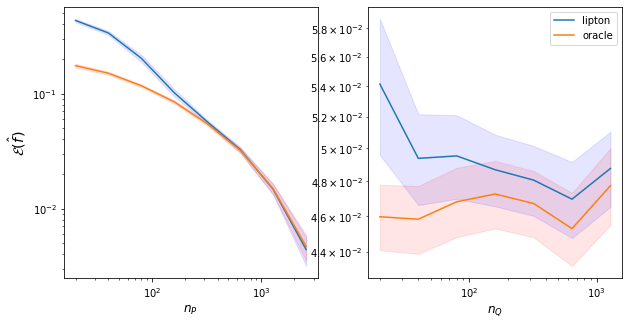

In [88]:
result1 = result.loc[result['n_target'] == 100]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['lipton-excess']['mean'], result1['lipton-excess']['std']
mean_o, std_o = result1['oracle-excess']['mean'], result1['oracle-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 400]

n, mean, std = result2['n_target'], result2['lipton-excess']['mean'], result2['lipton-excess']['std']
mean_o, std_o = result2['oracle-excess']['mean'], result2['oracle-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('lipton', 'oracle'), loc='middle left')
plt.show()

In [95]:
exp = 'results.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
print(type(df))
df = df.loc[df['labeled']==True]
const = 0.038
df['classical-excess'] = (df['classical'] - df['bayes_error']).astype('float32') + const
df['labeled-excess'] = (df['supervised'] - df['bayes_error']).astype('float32') + const

measure = ['classical-excess', 'labeled-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

<class 'pandas.core.frame.DataFrame'>


n_source n_target classical-excess           labeled-excess          
                                 mean       std           mean       std
0        20       40         0.263627  0.034172       0.155307  0.019525
1        80       10         0.432482  0.072473       0.135852  0.038955
2        80       60         0.221803  0.027590       0.108813  0.014969
3        80      160         0.134743  0.017919       0.096873  0.012845
4        80      360         0.087071  0.012045       0.078101  0.013636
5        80      760         0.053978  0.008720       0.060748  0.010100
6        80     1560         0.031546  0.009046       0.039016  0.008141
7        80     3160         0.019378  0.008112       0.025288  0.008027
8        80     6360         0.010267  0.006500       0.014117  0.007334
9       120       40         0.266908  0.036196       0.098158  0.015292
10      320       40         0.261430  0.032799       0.060830  0.010157
11      720       40         0.263801  0.037816       0.037691  0.008087
12     1520       40         0.265595  0.030948       0.020985  0.007472
13     3120       40         0.268642  0.032455       0.010992  0.007068
14     6320       40         0.263208  0.039100       0.004398  0.006373

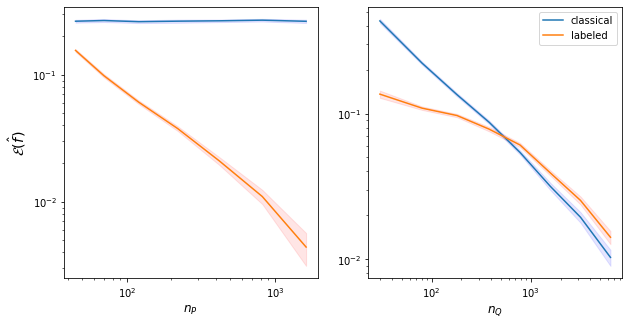

In [102]:
result1 = result.loc[result['n_target'] == 40]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source']/4 + result1['n_target'], result1['classical-excess']['mean'], result1['classical-excess']['std']
mean_o, std_o = result1['labeled-excess']['mean'], result1['labeled-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 80]

n, mean, std = result2['n_target'] + result2['n_source']/4, result2['classical-excess']['mean'], result2['classical-excess']['std']
mean_o, std_o = result2['labeled-excess']['mean'], result2['labeled-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('classical', 'labeled'), loc='middle left')
plt.show()

In [103]:
n

1      30.0
2      80.0
3     180.0
4     380.0
5     780.0
6    1580.0
7    3180.0
8    6380.0
dtype: float64